# Linear Algebra Practical Homework 2:

The following assignment consists of:
1. Implementation of elementary row operations : Scaling, Replacement, Interchange
2. Using the defined functions to find the answer of a system
3. Calculation of the determinant
4. EXTRA - Plotting the answer

TAs in charge: @ayrozz , @alijahan890

Please fill in the following information:

- Student: [Kiyan Pourazar]
- Student ID: [40131403]

# How to complete this notebook?
To complete this notebook you just need to change the parts of code that is marked by comment `#CHNAGE THIS PART`. Please do not change cells that contains comment `# DO NOT CHANGE THIS CELL`. These cells are for evaluating your implementation.

# Attention!
 - You are free to add, remove or edit each cell in any way you desire.
 - We strongly recommend you to observe the default order of different parts of this file.
 - NO PREDEFINED BUILT-IN FUNCTION OF EXTERNAL LIBRARIES SUCH AS NUMPY IS ALLOWED!

### 0. Libraries

In [2]:
import copy
import time
import matplotlib
import numpy as np
import copy

## 1. Implementation of elementary row operations
Implement these operations from scratch, for they will be used for upcoming sections


### 1.1. Scaling

In [3]:
def op_scale(A, R, C):
    #CHNAGE THIS PART
    R_index = R-1
    A[R_index, :] = np.multiply(A[R_index, :], C)
    return A
    """ Multiply the R-th row of the matrix A by C, and return the new matrix """

In [4]:
#e.g.
# DO NOT CHANGE THIS CELL
A = np.array([[10, 3, 2, 1],
               [ 1, 0, 4, 2],
               [ 7, 5,-1, 9],
               [-6,-7, 8,-4]])

op_scale(A, 2, 3)
print(A)
"""
 Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [ 7, 5,-1, 9],
                    [-6,-7, 8,-4]]
"""


[[10  3  2  1]
 [ 3  0 12  6]
 [ 7  5 -1  9]
 [-6 -7  8 -4]]


'\n Expected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [ 7, 5,-1, 9],\n                    [-6,-7, 8,-4]]\n'

### 1.2. Interchange

In [5]:
def op_interchange(A, R1, R2):
    #CHNAGE THIS PART
    R1_index = R1-1
    R2_index = R2-1
    A[[R1_index, R2_index]] = A[[R2_index, R1_index]]
    return A
    """ Replace R1-th and R2-th rows in the matrix A, and return the new matrix """

In [6]:
# e.g.
# DO NOT CHANGE THIS CELL

op_interchange(A, 3, 4)
print(A)
"""
Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [-6,-7, 8,-4],
                    [ 7, 5,-1, 9]]
"""

[[10  3  2  1]
 [ 3  0 12  6]
 [-6 -7  8 -4]
 [ 7  5 -1  9]]


'\nExpected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [-6,-7, 8,-4],\n                    [ 7, 5,-1, 9]]\n'

### 1.3. Replace

In [7]:
def op_replace(A, R1, R2 , C):
    #CHNAGE THIS PART
    R1_index = R1-1
    R2_index = R2-1
    A[R2_index,:] = A[R2_index,:] + C*A[R1_index,:]
    return A
    """ Replace the R2-th row with (R2 + C*R1), and return the new matrix """

In [8]:
# e.g.
# DO NOT CHANGE THIS CELL
op_replace(A, 2, 1, 4)
print(A)
"""
Expected_output = [[22, 3,50,25],
                   [ 3, 0,12, 6],
                   [-6,-7, 8,-4],
                   [ 7, 5,-1, 9]]
"""


[[22  3 50 25]
 [ 3  0 12  6]
 [-6 -7  8 -4]
 [ 7  5 -1  9]]


'\nExpected_output = [[22, 3,50,25],\n                   [ 3, 0,12, 6],\n                   [-6,-7, 8,-4],\n                   [ 7, 5,-1, 9]]\n'

## 2. Solving a system of linear equations
In this part, you are required to use the functions defined in the previous part to find the solution to a linear system of equations.


### 2.1. Row Echelon Form

In [11]:
def row_echelon(A):
    #CHNAGE THIS PART
    number_of_rows = A.shape[0]
    number_of_columns = A.shape[1]
    needs_change = False
    j = 0
    row_index = 0
    for i in range (number_of_columns):
        needs_change = False
        for j in range (row_index , number_of_rows):
            if A[j,i] != 0:
                needs_change = True
                break
        if not needs_change:
            continue
                
        if j != row_index:
            op_interchange(A,j+1,row_index+1)
            #A[[j,row_index]] = A[[row_index,j]]
        
        for z in range (row_index+1 , number_of_rows):
            scalar = -A[z,i]/A[row_index,i]
            op_replace(A,row_index+1,z+1,scalar)
            #A[z] = A[z] + scalar * A[row_index]
            
        row_index += 1
        
        
    return A
    """ Define an algorithm to find the row-echelon form of the input matrix, row-echelon form of a matrix is not unique, so any true row-echelon form is acceptable."""

In [12]:
#e.g.
# DO NOT CHANGE THIS CELL

B = np.array([[ 1, 2, 3, 4],
              [ 5, 6, 7, 8],
              [ 9,10,11,12]])

row_echelon(B)
print(B)
""""
Notice that any true row-echelon form is acceptable. An example is given below:
([[ 1, 2, 3, 4],
  [ 0,-4,-8,-12],
  [ 0, 0, 0, 0]])
"""


[[  1   2   3   4]
 [  0  -4  -8 -12]
 [  0   0   0   0]]


'"\nNotice that any true row-echelon form is acceptable. An example is given below:\n([[ 1, 2, 3, 4],\n  [ 0,-4,-8,-12],\n  [ 0, 0, 0, 0]])\n'

### 2.2. Reduce Row Echelon Form

In [13]:
def reduce(matrix):
    #CHNAGE THIS PART
    row, column = matrix.shape
    for i in range(row):
        c = -5
        for j in range(column):
            if matrix[i, j] != 0:
                c = j
                break

        if c != -5:
            matrix[i] = matrix[i] / float(matrix[i, c])

            for z in range(i):
                matrix[z] -= matrix[z, c] * matrix[i]
            
    
    return matrix
    """ Define an algorithm to find the reduced-row-echelon form of the input matrix 
        ATTENTION : Assume  the input matrix is already in row-echelon form!"""

In [14]:
# e.g.
# DO NOT CHANGE THIS CELL
B = np.array([[ 1, 2, 3, 4],
              [ 0,-4,-8,-12],
              [ 0, 0, 0, 0]])

reduce(B)
print(B)
"""
Expected_output = [[ 1, 0,-1,-2],
                   [ 0, 1, 2, 3],
                   [ 0, 0, 0, 0]]
"""

[[ 1  0 -1 -2]
 [ 0  1  2  3]
 [ 0  0  0  0]]


'\nExpected_output = [[ 1, 0,-1,-2],\n                   [ 0, 1, 2, 3],\n                   [ 0, 0, 0, 0]]\n'

### 2.3. Existence of the Solution
Based on the reduced form of the augmented matrix and prior to finding the answer, make sure the solution exists!

In [15]:
def is_consistent(A):
    for row in A:
        if np.all(row[:-1] == 0) and row[-1] != 0:
            return False
    
    return True
        
        
    #return False
    """ Make sure the system has a solution or not """

In [16]:
#e.g.
# DO NOT CHANGE THIS CELL
print(is_consistent(B))

"""
expected_output: true
"""

True


'\nexpected_output: true\n'

### 2.4. Uniqueness of the Solution
Based on prior information, make sure whether the solution is unique or not!

In [17]:
def is_unique(matrix):
    #CHNAGE THIS PART
    rows, columns = matrix.shape
    for col in range(columns-1):
        pivot_count = 0
        for row in range(rows):
            if matrix[row, col] != 0:
                pivot_count += 1
                if pivot_count > 1:
                    return False # More than one pivot in the column
        if pivot_count == 0:
            return False # No pivot in the column
    
    return True
    
                
    """ Address the uniqueness of solution """

In [16]:
#e.g.
# DO NOT CHANGE THIS CELL
print(is_unique(B))
"""
expected_output: false
"""

False


'\nexpected_output: false\n'

### 2.5. Finding (just a) Solution
If the system has a solution, find and return it.
If the system has infinite solutions, return only one solution and double-check it with the original system defintion.

In [30]:
def solve(A):
    #CHNAGE THIS PART
    if is_consistent(A):
        if is_unique(A):
            solutions = A[:,-1]
            my_dict = {f'x{i+1}': value for i, value in enumerate(solutions)}
            return my_dict
        else:
            #we will do the same because we can give 0 value to free variables
            number_of_rows, number_of_columns = A.shape
            solutions = A[:,-1]
            i = 0
            my_dict = {f'x{i+1}': value for i, value in enumerate(solutions)}
            if len(my_dict.keys()) != number_of_columns:
                minus = number_of_columns - len(my_dict.keys())
                for j in range(minus):
                    my_dict.update({f'x{i+j+1}': 0})
        return my_dict
            
                
    """ Find the solution, A is the augmented matrix """

In [31]:
Z = np.array([[ 1, 0,-1,-2],
              [ 0, 1, 2, 3],
              [ 0, 0, 0, 0]])

print(solve(Z))

{'x1': 0, 'x2': 3, 'x3': 0}


## 3. Determinant
In this section, you are requiered to find the determinant of a matrix in two different ways and compare them in the sense of computation complexity.


### 3.1. Recursive algorithm
Implement a recursive algorithm to compute the determinant of a N*N matrix, using expansion with respect to a column or a row.


In [19]:
def det_recursive(A):
    n = A.shape[0]
    if n == 2 : 
        return (A[0][0] * A[1][1]) - (A[1][0] * A[0][1])
    else:
        det = 0
        for col in range(n):
            i,j = 0,col
            hold = copy.deepcopy(A)
            pivot = hold[i][j]
            new_matrix = np.delete(hold, i, axis = 0)
            new_matrix = np.delete(new_matrix, j, axis = 1)
            det += ((-1)**(i+j)) * pivot * det_recursive(new_matrix)
            
        return det
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise an error otherwise """

In [20]:
#e.g.
# DO NOT CHANGE THIS CELL
Matrix = np.array([[ 5, 7,-2, 1],
                   [-1, 5,-3, 0],
                   [ 3,11,-2,-9],
                   [ 8, 0, 4,-1]])
print(det_recursive(Matrix))
"""
expected_output = 190
"""

190


'\nexpected_output = 190\n'

#### 3.1.1. Test your algorithm
Measure the computation time of you recursive algorithm by testing it N*N matrixes, N= 2, 3, 4, 5, 6, 7

In [21]:
''' please notice that the code I had written for this part used the shape of a matrix, there for I needed to generate np arrays'''

' please notice that the code I had written for this part used the shape of a matrix, there for I needed to generate np arrays'

In [26]:
# Testing
def generate_random_matrix(n):
    return np.random.randint(low=0, high=10, size=(n, n))


matrices = []
for size in range(2, 8):
    matrix = generate_random_matrix(size)
    matrices.append(matrix)


# define the rest of the matrixes up to 7*7, you may use random number generators
Y_points_recursive = []
elapsed_time_recursive=[0]*6
index = 0
for matrix in matrices:
    start_time = time.time()
    d1 = det_recursive(matrix)
    end_time = time.time()
    elapsed_time_recursive[index] = end_time - start_time
    Y_points_recursive.append(elapsed_time_recursive[index])
    index+=1
    print(f"Time Elapsed for recursive computation of determinant of M{matrix.shape[0]} : " , elapsed_time_recursive[index-1])
    
    
print(Y_points_recursive)    
# Do the same for the rest of the matrices up to 7*7


Time Elapsed for recursive computation of determinant of M2 :  0
Time Elapsed for recursive computation of determinant of M3 :  0
Time Elapsed for recursive computation of determinant of M4 :  0
Time Elapsed for recursive computation of determinant of M5 :  0
Time Elapsed for recursive computation of determinant of M6 :  0
Time Elapsed for recursive computation of determinant of M7 :  0
[0.0, 0.0, 0.00037860870361328125, 0.00141143798828125, 0.006636619567871094, 0.04484224319458008]


### 3.2. Row Echelon
Use the function defined in part 1 to find the row echelon form of the matrix and calculate the determinant

#### ATTENTION: BEWARE OF THE IMPACT OF EACH OPERATION ON THE DETERMINANT!

In [28]:
def det_row_echelon(A):
    echeloned = row_echelon(A)
    det = 1
    for i in range(len(A)):
        det *= echeloned[i][i]
        
    return det
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise error otherwise """

#### 3.2.1 Test your algorithm
Measure the computation time of you recursive algorithm by testing it on the matrixes defined in the previous section.

In [29]:
# Testing
matrices = []
for size in range(2, 8):
    matrix = generate_random_matrix(size)
    matrices.append(matrix)


# define the rest of the matrixes up to 7*7, you may use random number generators
Y_points_rowechelon = []
elapsed_time_rowechelon=[0]*6
index = 0
for matrix in matrices:
    start_time = time.time()
    d1 = det_row_echelon(matrix)
    end_time = time.time()
    elapsed_time_rowechelon[index] = end_time - start_time
    Y_points_rowechelon.append(elapsed_time_rowechelon[index])
    index+=1
    print(f"Time Elapsed for recursive computation of determinant of M{matrix.shape[0]} : " , elapsed_time_rowechelon[index-1])
    
    
print(Y_points_rowechelon)    
"""elapsed_time_rowechelon=[0]*6

start_time = time.time()
d1 = det_row_echelon(M2)
end_time= time.time()
elapsed_time_rowechelon[0] = end_time - start_time

print("Time Elapsed for recursive computation of determinant of M2 : " , elapsed_time_rowechelon[0])
"""
# Do the same for the rest of the matrices up to 7*7

Time Elapsed for recursive computation of determinant of M2 :  0.0
Time Elapsed for recursive computation of determinant of M3 :  0.0010013580322265625
Time Elapsed for recursive computation of determinant of M4 :  0.0
Time Elapsed for recursive computation of determinant of M5 :  0.0
Time Elapsed for recursive computation of determinant of M6 :  0.0
Time Elapsed for recursive computation of determinant of M7 :  0.0004627704620361328
[0.0, 0.0010013580322265625, 0.0, 0.0, 0.0, 0.0004627704620361328]


'elapsed_time_rowechelon=[0]*6\n\nstart_time = time.time()\nd1 = det_row_echelon(M2)\nend_time= time.time()\nelapsed_time_rowechelon[0] = end_time - start_time\n\nprint("Time Elapsed for recursive computation of determinant of M2 : " , elapsed_time_rowechelon[0])\n'

### 3.3. Compare the computation time of the two proposed methods
Try to plot the computation time versus matrix size for both methods using matplotlib functions.

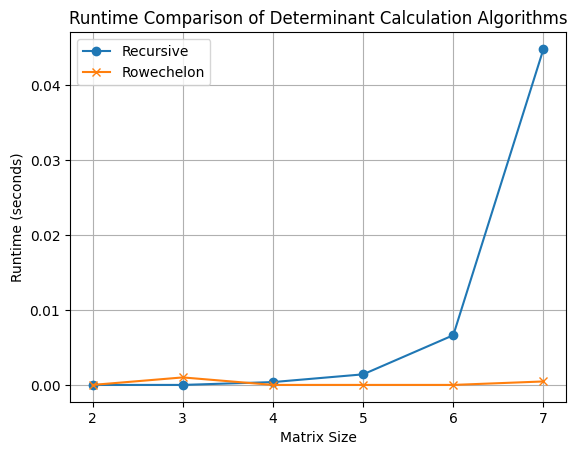

In [30]:
# Plot the recorded data
import matplotlib.pyplot as plt
X_points = [2,3,4,5,6,7]
plt.plot(X_points, Y_points_recursive, marker = 'o' , label = 'Recursive')
plt.plot(X_points, Y_points_rowechelon, marker = 'x', label = 'Rowechelon')

plt.xlabel('Matrix Size')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison of Determinant Calculation Algorithms')

plt.legend()
plt.grid(True) # Add grid for better readability
plt.show()


## 4. EXTRA - 2D and 3D plotting
In this part, you are demanded to solve two underdetermined systems of size N=2 and N=3 and plot the hyperplane of the results using matplotlib.
For example if a 2*2 system in underdetermined (has infinitely many solutions), the solution space is the span of a vector set consisting of one 2-dimentional vector, thus it can be plotted as a line in the 2D space.

Solving this part will provide you with extra points.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the solution set
def plotting(matrix):   # input is reduced echelon form matrix

    if matrix.shape[0] == 2:
        rref_matrix_2d = matrix

# Extracting solutions for a 2D plot
        x = np.linspace(-10, 10, 100)
        y = rref_matrix_2d[0, 2] + rref_matrix_2d[1, 2] * x

# Plotting the 2D solution
        plt.figure()
        plt.plot(x, y, label='Solution')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('2D Solution Plot')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example RREF matrix for a 3D system
# This is a simplified example; your actual RREF matrix might be different
    rref_matrix_3d = matrix
    if matrix.shape[0] == 3 : 
# Extracting solutions for a 3D plot
        x = np.linspace(-10, 10, 100)
        y = np.linspace(-10, 10, 100)
        X, Y = np.meshgrid(x, y)
        Z = rref_matrix_3d[0, 3] + rref_matrix_3d[1, 3] * X + rref_matrix_3d[2, 3] * Y

# Plotting the 3D solution
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, alpha=0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3D Solution Plot')
        plt.show()

    

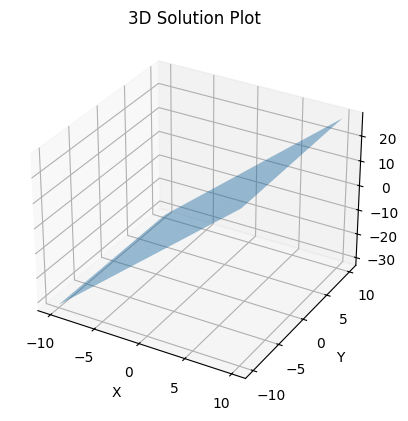

In [37]:
Z = np.array([[ 1, 0,-1,-2],
              [ 0, 1, 2, 3],
              [ 0, 0, 0, 0]])

plotting(Z)